In [1]:
import nibabel as nib
import matplotlib.pyplot as plt 
import numpy as np
from ipywidgets import interact, widgets

In [2]:
nii_file_path = "dataset\HC\sub-05_T1w.nii"
nii_image = nib.load(nii_file_path)
image_data= nii_image.get_fdata()  

In [3]:
def update_image(slice_number):
    slice_array = image_data[:, :, slice_number]
    plt.imshow(slice_array, cmap="gray")
    plt.title("Anat MRI")
    plt.colorbar()
    plt.show()

In [4]:
dimensions = image_data.shape
num_channels = dimensions[-1] if len(dimensions) > 3 else 1

In [5]:
slice_slider = widgets.IntSlider(
    min=1,
    max=dimensions[2] - 1,
    step=1,
    value=dimensions[2] - 1,
    description="Slice"
)

In [6]:
interact(update_image, slice_number=slice_slider)


interactive(children=(IntSlider(value=179, description='Slice', max=179, min=1), Output()), _dom_classes=('wid…

<function __main__.update_image(slice_number)>

In [7]:
nii_file_path = "dataset\HC\sub-05_task-speech_bold.nii"
nii_image = nib.load(nii_file_path)
image_data= nii_image.get_fdata()  
dimensions = image_data.shape
num_channels = dimensions[3] if len(dimensions) > 3 else 1
print(dimensions)

(96, 96, 32, 341)


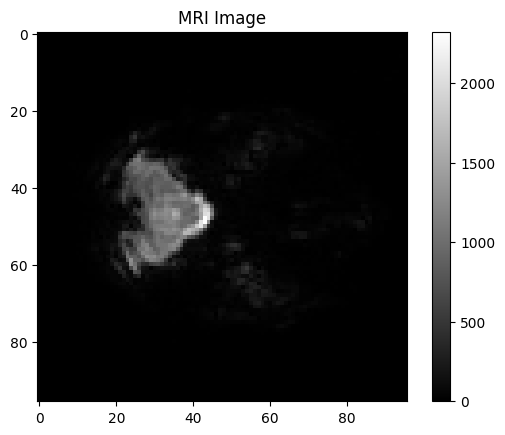

In [8]:
slice_array = image_data[:, :, 2,152]
plt.imshow(slice_array, cmap="gray")
plt.title("MRI Image")
plt.colorbar()
plt.show()

In [9]:
slice_slider = widgets.SelectionSlider(
    options=list(range(dimensions[2])),
    description="Slice",
    continous_update=True
)
channel_slider = widgets.SelectionSlider(
    options=list(range(num_channels)),
    description="Channel",
    continuous_update=True
)

In [10]:
def update_image_4D(channel_number,slice_number):
    #channel_number=3
    slice_array = image_data[:, :, slice_number,channel_number]
    plt.imshow(slice_array, cmap="gray")
    plt.title("MRI Image")
    plt.colorbar()
    plt.show()

In [11]:
interact(update_image_4D,channel_number=channel_slider ,slice_number=slice_slider)


interactive(children=(SelectionSlider(description='Channel', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

<function __main__.update_image_4D(channel_number, slice_number)>

In [45]:
def mri_view(file_path):
    nii_file_path = file_path
    nii_image = nib.load(nii_file_path)
    image_data= nii_image.get_fdata()  
    dimensions = image_data.shape
    print(dimensions)
    num_channels = dimensions[3] if len(dimensions) > 3 else 1
    slice_slider = widgets.SelectionSlider(
        options=list(range(dimensions[2])),
        description="Slice",
        continous_update=True
    )
    channel_slider = widgets.SelectionSlider(
        options=list(range(num_channels)),
        description="Channel",
        continuous_update=True
    )
    def update_image_4D(channel_number,slice_number):
        #channel_number=3
        slice_array = image_data[:, :, slice_number,channel_number]
        plt.imshow(slice_array, cmap="gray")
        plt.title("functional MRI Image")
        plt.colorbar()
        plt.show()
    interact(update_image_4D,channel_number=channel_slider ,slice_number=slice_slider)

In [48]:
mri_view("dataset\AVH-\sub-40_task-speech_bold.nii")

(96, 96, 32, 341)


interactive(children=(SelectionSlider(description='Channel', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…

In [33]:
mri_view("dataset\AVH-\sub-29_task-speech_bold.nii")

(96, 96, 32, 341)


interactive(children=(SelectionSlider(description='Channel', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12…